In [602]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [603]:
df = pd.read_csv('data/steam-200k.csv')

In [604]:
df.head()

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


In [605]:
df.columns = ['user_id', 'game', 'action', 'value', '0']

### EDA

In [606]:
df.head()

,user_id,game,action,value,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


In [607]:
df['game'].unique().size

5155

In [608]:
df['user_id'].unique().size

12393

<Axes: title={'center': 'Top 10 owned games'}, xlabel='game', ylabel='count'>

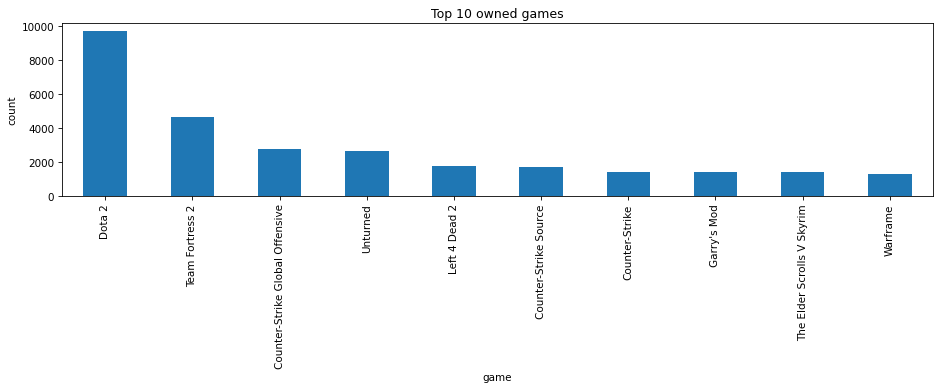

In [609]:
n_owned_games = 10
fig, ax = plt.subplots(1, 1, figsize=(15, 3))
ax.set_title(label=f'Top {n_owned_games} owned games')
ax.set_xlabel(xlabel='game')
ax.set_ylabel(ylabel='count')
fig.set_dpi(val=75)
df['game'].value_counts()[:n_owned_games].plot.bar(ax=ax)

/var/folders/bf/b11n35tn2rq9mr6mw11m8f7w0000gn/T/ipykernel_3632/372093266.py:7: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df[df['action'] == 'play'].groupby(by='game')['value'].aggregate(sum).sort_values(ascending=False)[:n_played_games].plot.bar(ax=ax)


<Axes: title={'center': 'Top 10 played games (hours accumulated)'}, xlabel='game', ylabel='hours played'>

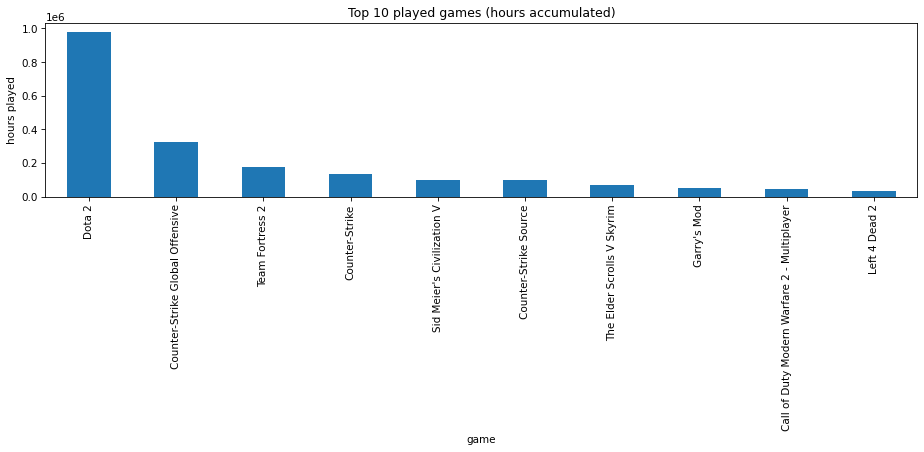

In [610]:
n_played_games = 10
fig, ax = plt.subplots(1, 1, figsize=(15, 3))
ax.set_xlabel(xlabel='game')
ax.set_ylabel(ylabel='hours played')
fig.set_dpi(75)
ax.set_title(label=f'Top {n_played_games} played games (hours accumulated)')
df[df['action'] == 'play'].groupby(by='game')['value'].aggregate(sum).sort_values(ascending=False)[:n_played_games].plot.bar(ax=ax)

<Axes: title={'center': 'Top 10 played games (hours accumulated)'}, xlabel='0', ylabel='hours played'>

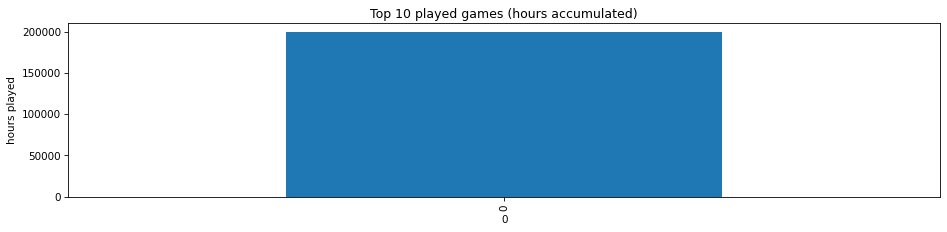

In [611]:
fig, ax = plt.subplots(1, 1, figsize=(15, 3))
ax.set_xlabel(xlabel='0')
ax.set_ylabel(ylabel='hours played')
fig.set_dpi(75)
ax.set_title(label=f'Top {n_played_games} played games (hours accumulated)')
df['0'].value_counts().plot.bar(ax=ax)

### Creating user-item matrix
Each row corresponds to a user and each column corresponds to a game. The value in each cell represents the 'rating' given by a user to a game. The 'rating' is computed based on the hours played by a user.

In [612]:
df = df[df['action'] == 'play']
df.head()

,user_id,game,action,value,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,play,14.9,0
6,151603712,Fallout New Vegas,play,12.1,0
8,151603712,Left 4 Dead 2,play,8.9,0


In [613]:
aggregated_data = df.groupby(['user_id', 'game'], as_index=False)['value'].sum()
user_item_matrix = aggregated_data.pivot(index='user_id', columns='game', values='value')
user_item_matrix = user_item_matrix.fillna(0)
user_item_matrix.head()

game,007 Legends,0RBITALIS,1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),10 Second Ninja,"10,000,000",100% Orange Juice,1000 Amps,12 Labours of Hercules,12 Labours of Hercules II The Cretan Bull,12 Labours of Hercules III Girl Power,...,rFactor,rFactor 2,realMyst,realMyst Masterpiece Edition,resident evil 4 / biohazard 4,rymdkapsel,sZone-Online,the static speaks my name,theHunter,theHunter Primal
user_id,,,,,,,,,,,,,,,,,,,,,
5250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
181212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [614]:
print(f'User-Item matrix shape: {user_item_matrix.shape}')

User-Item matrix shape: (11350, 3600)


### Normalization of the data
Before using the data for computing recommendations, it is normalized.

In [615]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
user_item_matrix_standardized = pd.DataFrame(data=standard_scaler.fit_transform(user_item_matrix),
                                             index=user_item_matrix.index,
                                             columns=user_item_matrix.columns)

In [616]:
user_item_matrix_standardized.head()

game,007 Legends,0RBITALIS,1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),10 Second Ninja,"10,000,000",100% Orange Juice,1000 Amps,12 Labours of Hercules,12 Labours of Hercules II The Cretan Bull,12 Labours of Hercules III Girl Power,...,rFactor,rFactor 2,realMyst,realMyst Masterpiece Edition,resident evil 4 / biohazard 4,rymdkapsel,sZone-Online,the static speaks my name,theHunter,theHunter Primal
user_id,,,,,,,,,,,,,,,,,,,,,
5250,-0.009387,-0.01533,-0.014952,-0.010212,-0.009387,-0.015629,-0.009387,-0.021466,-0.01723,-0.014035,...,-0.009387,-0.009387,-0.011535,-0.012822,-0.024712,-0.009387,-0.044,-0.023848,-0.027844,-0.011235
76767,-0.009387,-0.01533,-0.014952,-0.010212,-0.009387,-0.015629,-0.009387,-0.021466,-0.01723,-0.014035,...,-0.009387,-0.009387,-0.011535,-0.012822,-0.024712,-0.009387,-0.044,-0.023848,-0.027844,-0.011235
86540,-0.009387,-0.01533,-0.014952,-0.010212,-0.009387,-0.015629,-0.009387,-0.021466,-0.01723,-0.014035,...,-0.009387,-0.009387,-0.011535,-0.012822,-0.024712,-0.009387,-0.044,-0.023848,-0.027844,-0.011235
144736,-0.009387,-0.01533,-0.014952,-0.010212,-0.009387,-0.015629,-0.009387,-0.021466,-0.01723,-0.014035,...,-0.009387,-0.009387,-0.011535,-0.012822,-0.024712,-0.009387,-0.044,-0.023848,-0.027844,-0.011235
181212,-0.009387,-0.01533,-0.014952,-0.010212,-0.009387,-0.015629,-0.009387,-0.021466,-0.01723,-0.014035,...,-0.009387,-0.009387,-0.011535,-0.012822,-0.024712,-0.009387,-0.044,-0.023848,-0.027844,-0.011235


### User similarity computation
Recommendations are aimed to be made using the similarity between users. In this sense, it can be computed based on the 'ratings' using _cosine similarity_.

In [617]:
from sklearn.metrics.pairwise import cosine_similarity
user_similarities = cosine_similarity(X=user_item_matrix)
user_similarities_df = pd.DataFrame(data=user_similarities,
                                    index=user_item_matrix.index,
                                    columns=user_item_matrix.index)


In [618]:
user_similarities_df

user_id,5250,76767,86540,144736,181212,229911,298950,381543,547685,554278,...,309228590,309255941,309262440,309265377,309404240,309434439,309554670,309626088,309824202,309903146
user_id,,,,,,,,,,,,,,,,,,,,,
5250,1.00000,0.002480,0.000000,0.000000,0.000000,9.778883e-06,0.016179,0.000000,0.000000,0.000000,...,0.00127,0.0,0.005081,0.0,0.000835,0.00127,0.0,0.000000,0.00127,0.00127
76767,0.00248,1.000000,0.000128,0.685379,0.669058,3.389927e-01,0.003713,0.685379,0.037465,0.050745,...,0.00000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.024599,0.00000,0.00000
86540,0.00000,0.000128,1.000000,0.000000,0.000000,7.168671e-07,0.104667,0.000000,0.000000,0.002336,...,0.00000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.005215,0.00000,0.00000
144736,0.00000,0.685379,0.000000,1.000000,0.976187,2.165145e-01,0.000414,1.000000,0.044944,0.000000,...,0.00000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.00000,0.00000
181212,0.00000,0.669058,0.000000,0.976187,1.000000,2.116718e-01,0.000404,0.976187,0.043874,0.000000,...,0.00000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309434439,0.00127,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000414,0.000000,0.000000,0.000000,...,1.00000,0.0,0.000000,0.0,0.000000,1.00000,0.0,0.000000,1.00000,1.00000
309554670,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.00000,1.0,0.000000,0.0,0.164316,0.00000,1.0,0.000000,0.00000,0.00000
309626088,0.00000,0.024599,0.005215,0.000000,0.000000,0.000000e+00,0.000993,0.000000,0.000000,0.000000,...,0.00000,0.0,0.000000,0.0,0.000000,0.00000,0.0,1.000000,0.00000,0.00000


### Missing ratings computation

In [619]:
user_id = 5250

In [620]:
weights_user_similarity = user_similarities_df[user_id]
print(f'User count: {weights_user_similarity.count()}')
weights_user_similarity.head()

User count: 11350


user_id
5250      1.00000
76767     0.00248
86540     0.00000
144736    0.00000
181212    0.00000
Name: 5250, dtype: float64

In [621]:
user_item_matrix_standardized

game,007 Legends,0RBITALIS,1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),10 Second Ninja,"10,000,000",100% Orange Juice,1000 Amps,12 Labours of Hercules,12 Labours of Hercules II The Cretan Bull,12 Labours of Hercules III Girl Power,...,rFactor,rFactor 2,realMyst,realMyst Masterpiece Edition,resident evil 4 / biohazard 4,rymdkapsel,sZone-Online,the static speaks my name,theHunter,theHunter Primal
user_id,,,,,,,,,,,,,,,,,,,,,
5250,-0.009387,-0.01533,-0.014952,-0.010212,-0.009387,-0.015629,-0.009387,-0.021466,-0.01723,-0.014035,...,-0.009387,-0.009387,-0.011535,-0.012822,-0.024712,-0.009387,-0.044,-0.023848,-0.027844,-0.011235
76767,-0.009387,-0.01533,-0.014952,-0.010212,-0.009387,-0.015629,-0.009387,-0.021466,-0.01723,-0.014035,...,-0.009387,-0.009387,-0.011535,-0.012822,-0.024712,-0.009387,-0.044,-0.023848,-0.027844,-0.011235
86540,-0.009387,-0.01533,-0.014952,-0.010212,-0.009387,-0.015629,-0.009387,-0.021466,-0.01723,-0.014035,...,-0.009387,-0.009387,-0.011535,-0.012822,-0.024712,-0.009387,-0.044,-0.023848,-0.027844,-0.011235
144736,-0.009387,-0.01533,-0.014952,-0.010212,-0.009387,-0.015629,-0.009387,-0.021466,-0.01723,-0.014035,...,-0.009387,-0.009387,-0.011535,-0.012822,-0.024712,-0.009387,-0.044,-0.023848,-0.027844,-0.011235
181212,-0.009387,-0.01533,-0.014952,-0.010212,-0.009387,-0.015629,-0.009387,-0.021466,-0.01723,-0.014035,...,-0.009387,-0.009387,-0.011535,-0.012822,-0.024712,-0.009387,-0.044,-0.023848,-0.027844,-0.011235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309434439,-0.009387,-0.01533,-0.014952,-0.010212,-0.009387,-0.015629,-0.009387,-0.021466,-0.01723,-0.014035,...,-0.009387,-0.009387,-0.011535,-0.012822,-0.024712,-0.009387,-0.044,-0.023848,-0.027844,-0.011235
309554670,-0.009387,-0.01533,-0.014952,-0.010212,-0.009387,-0.015629,-0.009387,-0.021466,-0.01723,-0.014035,...,-0.009387,-0.009387,-0.011535,-0.012822,-0.024712,-0.009387,-0.044,-0.023848,-0.027844,-0.011235
309626088,-0.009387,-0.01533,-0.014952,-0.010212,-0.009387,-0.015629,-0.009387,-0.021466,-0.01723,-0.014035,...,-0.009387,-0.009387,-0.011535,-0.012822,-0.024712,-0.009387,-0.044,-0.023848,-0.027844,-0.011235


<Axes: ylabel='game'>

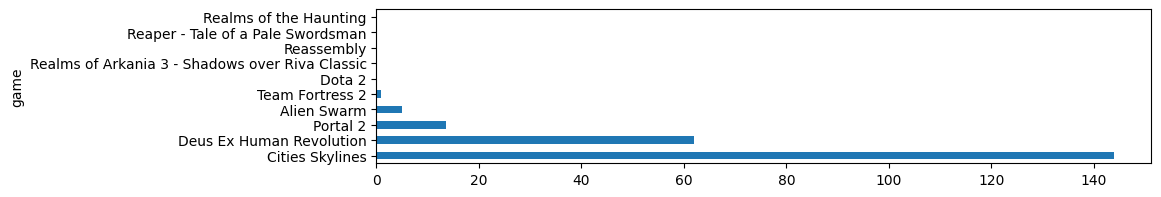

In [622]:
fig, ax = plt.subplots(1, 1, figsize=(10, 2))
user_item_matrix.loc[user_id].sort_values(ascending=False)[:10].plot.barh(ax=ax)

In [623]:
print(f'Recommendable items: {user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] == 0].__len__()}')
predictions = pd.Series()
for item_id in user_item_matrix_standardized.columns:
    if user_item_matrix.loc[user_id][item_id] == 0:
        users_who_rated_item = user_item_matrix.loc[:][item_id][user_item_matrix.loc[:][item_id] != 0].index
        numerator = 0
        denominator = 0
        for other_user_id in users_who_rated_item:
            similarity = user_similarities_df.loc[user_id][other_user_id]
            rating = user_item_matrix_standardized.loc[other_user_id][item_id]
            numerator += similarity * rating
            denominator += abs(similarity)
        if denominator == np.float64(0) :
            predictions[item_id] = 0
        else:
            predictions[item_id] = numerator / denominator

Recommendable items: 3594


In [624]:
predictions.sort_values(ascending=False).head(10)

The Age of Decadence               106.531685
Stellar Impact                     106.531685
Conflict Denied Ops                106.531685
BloodRayne                         106.531685
Abandoned Chestnut Lodge Asylum    106.531685
                                      ...    
SONIC THE HEDGEHOG 4 Episode II     76.799668
A Walk in the Dark                  76.757350
FarSky                              76.305259
Moon Breakers                       76.256082
Hollywood Visionary                 76.205519
Length: 1000, dtype: float64